## Problem Statement
- Build a predictive model that estimates airline ticket prices based on multiple factors including airline, source, destination, class, stops, flight duration, and days left before departure.
The objective is to understand key price drivers and create a high-accuracy prediction model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:/Users/HP/Desktop/ML Projects/Flight price_Dataset.csv")

In [7]:
df.shape

(300153, 12)

In [9]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [13]:
df=df.drop(columns={'Unnamed: 0','flight'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [37]:
df.describe()

,duration,days_left,price
count,297940.000000,297940.000000,297940.000000
mean,12.283063,26.004602,20976.448604
std,7.176754,13.557190,22734.394635
min,0.830000,1.000000,1105.000000
25%,6.920000,15.000000,4792.000000
50%,11.330000,26.000000,7466.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [17]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Observation:
 - No missing values found

In [19]:
df.duplicated().sum()

2213

In [21]:
df=df.drop_duplicates()

In [23]:
df.duplicated().sum()

0

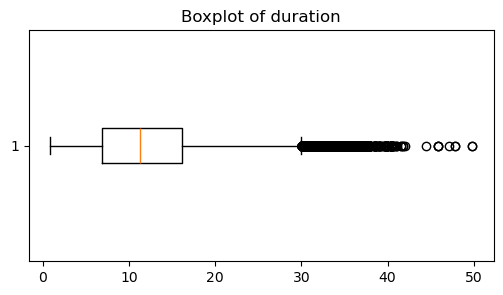

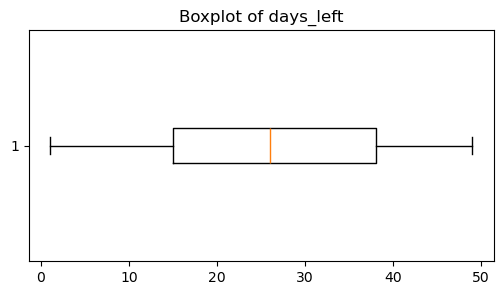

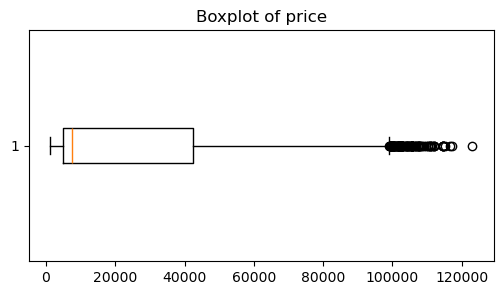

In [25]:
nume_cols=df.select_dtypes(include=['float64', 'int64'])
for col in nume_cols.columns:
    plt.figure(figsize=(6, 3))
    plt.boxplot(nume_cols[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [27]:
def remove_outliers(df,nume_cols):
    df1=df.copy()
    for col in nume_cols:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3 - Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR      
        df1=df1[(df1[col]>=lower)&(df1[col]<=upper)]
    return df1

In [29]:
df1 = remove_outliers(df, nume_cols)
print("Before:", df.shape)
print("After:", df1.shape)

Before: (297940, 10)
After: (295606, 10)


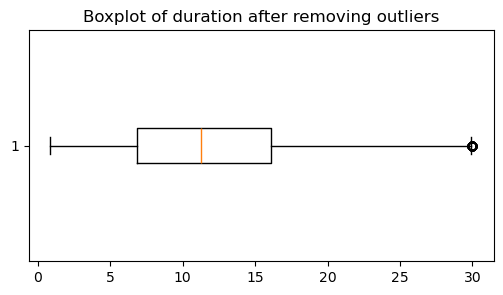

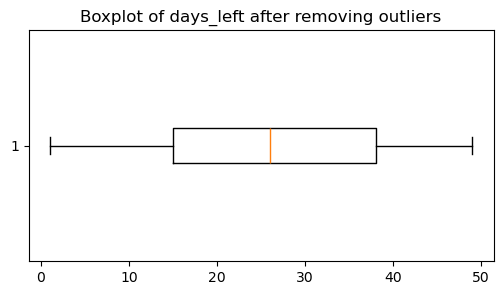

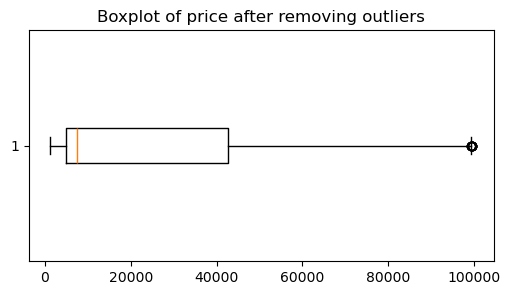

In [31]:
for col in nume_cols.columns:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df1[col],vert=False)
    plt.title(f"Boxplot of {col} after removing outliers")
    plt.show()

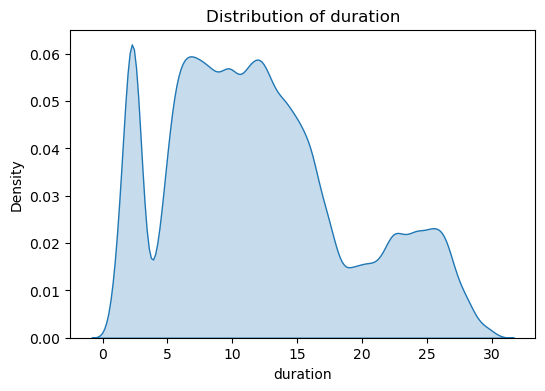

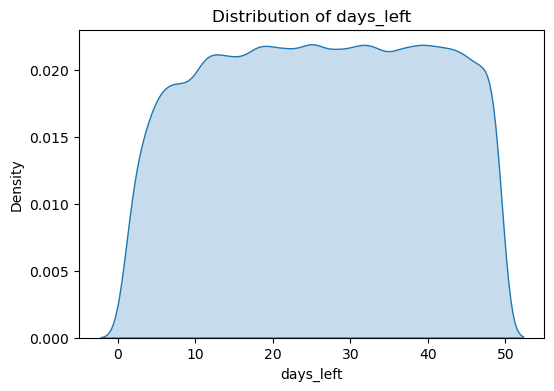

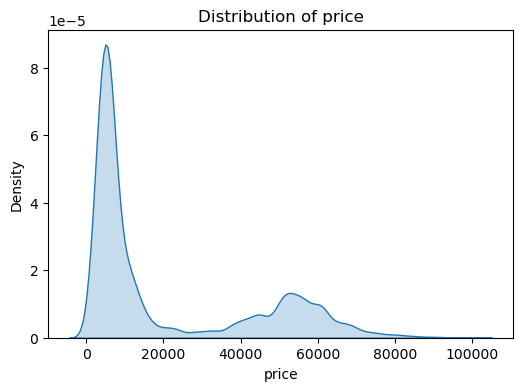

In [33]:
for i in df1.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(6,4))
    sns.kdeplot(df1,x=i,fill=True)
    plt.title(f"Distribution of {i}")

In [35]:
df['price'].value_counts()

price
54608    1445
54684    1390
60978    1383
2339     1354
60508    1222
         ... 
15792       1
17309       1
19101       1
7654        1
7533        1
Name: count, Length: 12157, dtype: int64

In [47]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

### Price vs Airline

C:\Users\HP\AppData\Local\Temp\ipykernel_1320\2374397318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_price.values,y=airline_price.index,palette="coolwarm")


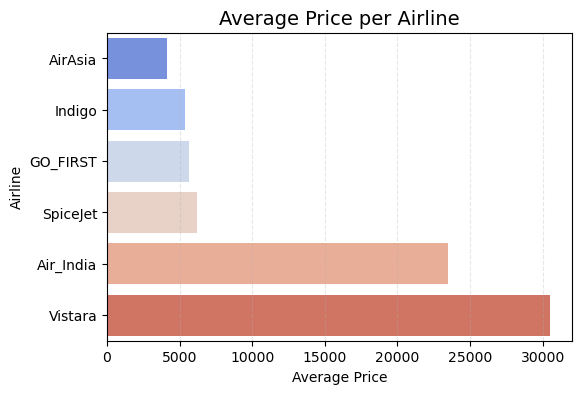

In [200]:
plt.figure(figsize=(6,4))
airline_price = df.groupby('airline')['price'].mean().sort_values()
sns.barplot(x=airline_price.values,y=airline_price.index,palette="coolwarm")
plt.title("Average Price per Airline", fontsize=14)
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

### Observation:
- Vistara and Air India are the most expensive airlines, with significantly higher average ticket prices than others.
- Low-cost carriers like AirAsia, Indigo, SpiceJet, and GoFirst show much lower and similar average prices, indicating budget-friendly options.
- The clear price gap suggests that airline brand and service tier play an important role in ticket pricing.

### Avg Price by class 

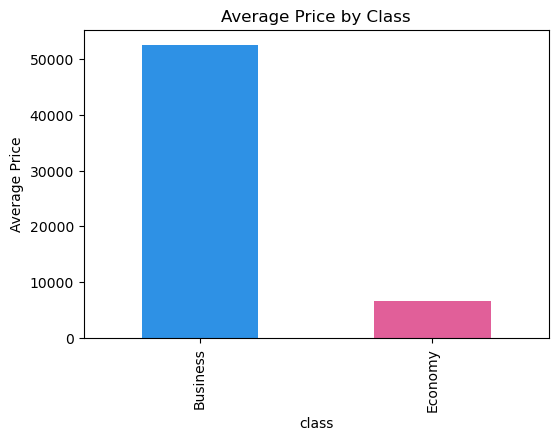

In [208]:
plt.figure(figsize=(6,4))
class_price = df.groupby('class')['price'].mean()
colors = ['#2E91E5', '#E15F99']
class_price.plot(kind='bar',color=colors)
plt.title("Average Price by Class")
plt.ylabel("Average Price")
plt.show()

### Observations:
- Business class tickets are significantly more expensive than Economy.
- Class is one of the strongest predictors of ticket price.

### Price vs Source city

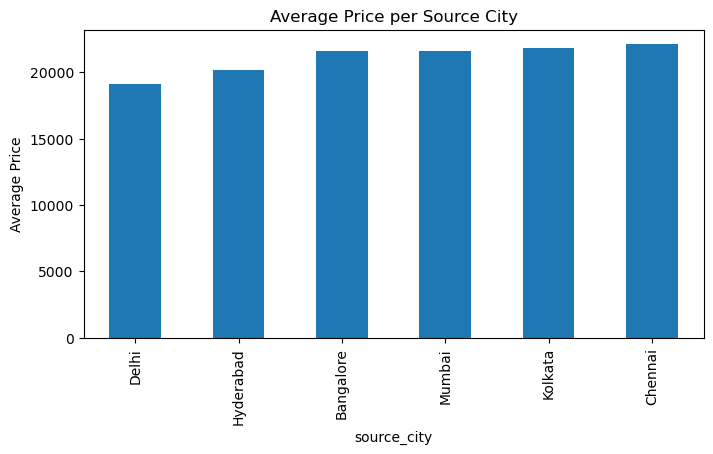

In [93]:
plt.figure(figsize=(8,4))
source_price = df.groupby('source_city')['price'].mean().sort_values()
source_price.plot(kind='bar')
plt.title("Average Price per Source City")
plt.ylabel("Average Price")
plt.show()

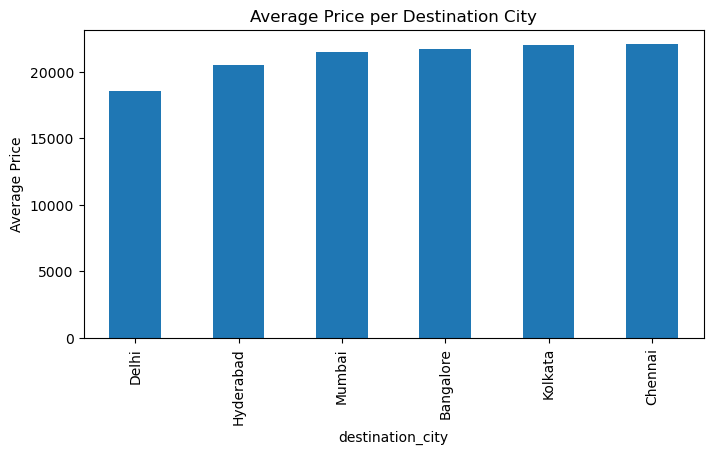

In [99]:
plt.figure(figsize=(8,4))
dest_price = df.groupby('destination_city')['price'].mean().sort_values()
dest_price.plot(kind='bar')
plt.title("Average Price per Destination City")
plt.ylabel("Average Price")
plt.show()

### Flight duration vs Price

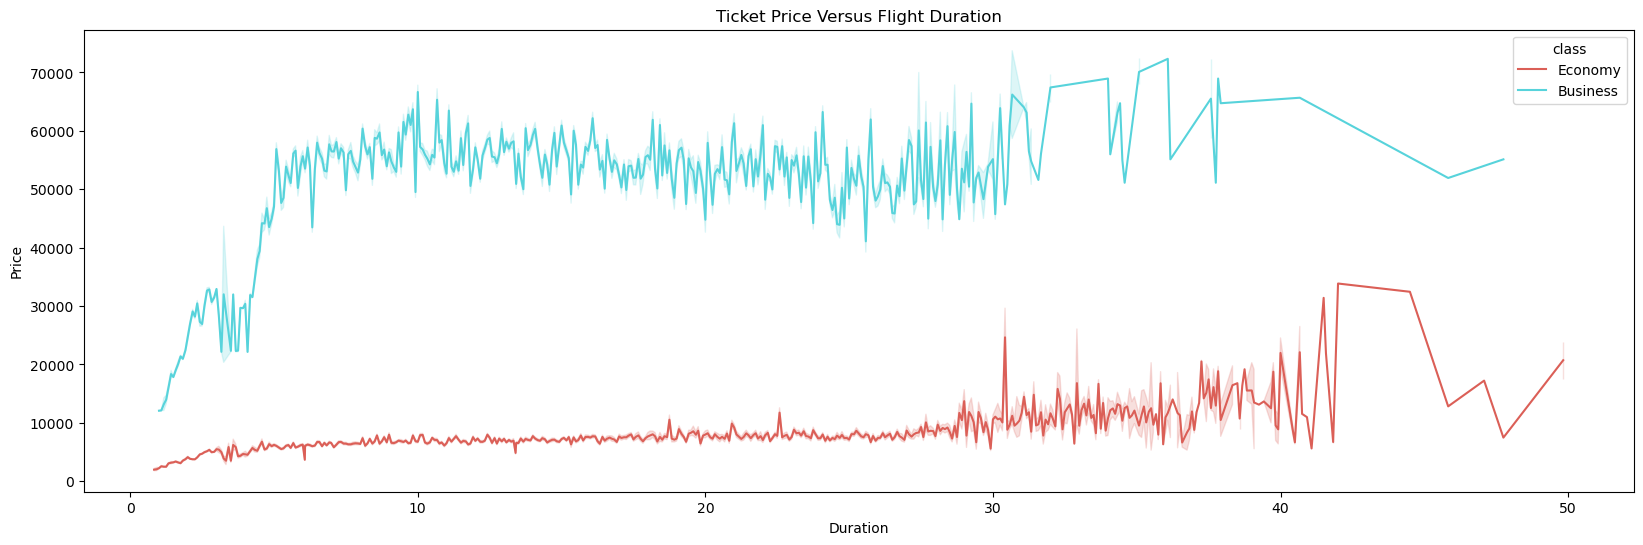

In [90]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price vs Flight Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

### Observation:
- Business class is consistently far more expensive than Economy for all durations.
- Large fluctuations appear after long durations due to fewer flights in that range.
- Class impacts price much more than duration.

### Price vs Departure Time

C:\Users\HP\AppData\Local\Temp\ipykernel_1320\129452676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='departure_time', y='price', data=df,palette='viridis')


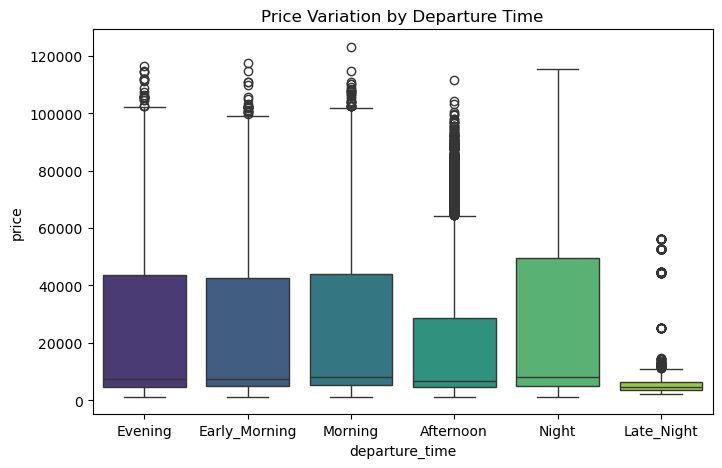

In [193]:
plt.figure(figsize=(8,5))
sns.boxplot(x='departure_time', y='price', data=df,palette='viridis')
plt.title("Price Variation by Departure Time")
plt.show()

### Observation:
- Morning/Early-Morning and Night flights are the most expensive and volatile.
- While Afternoon and Late-Night flights are consistently cheaper.

### Price vs Days Left (Trend Line)

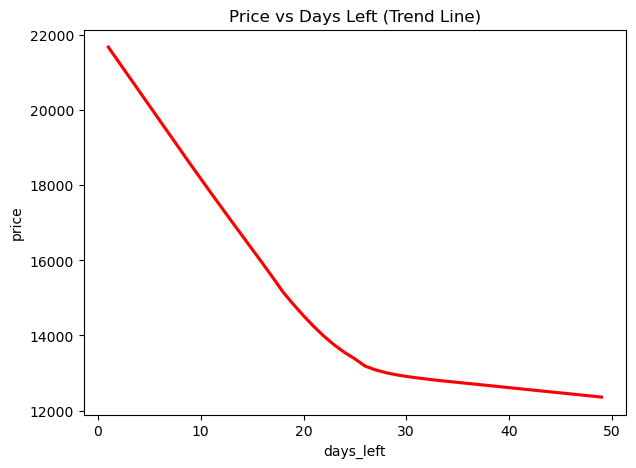

In [57]:
plt.figure(figsize=(7,5))
sns.regplot(x=df['days_left'],y=df['price'],scatter=False,lowess=True,color='red')
plt.title("Price vs Days Left (Trend Line)")
plt.show()

### Observation:
- The LOWESS trend line clearly shows a strong negative correlation between days_left and ticket price.
- Last-minute bookings (0–10 days) exhibit the highest and most unstable prices, reflecting peak demand and limited seat availability.
- Between 10–25 days, prices decline sharply, indicating the optimal booking window where airlines reduce fares to fill seats.
- After 25 days, prices stabilize at a lower range, showing minimal variation and representing the cheapest booking period.

### Price vs stops

C:\Users\HP\AppData\Local\Temp\ipykernel_1320\34845270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['stops'], y=df['price'], palette='Set2')


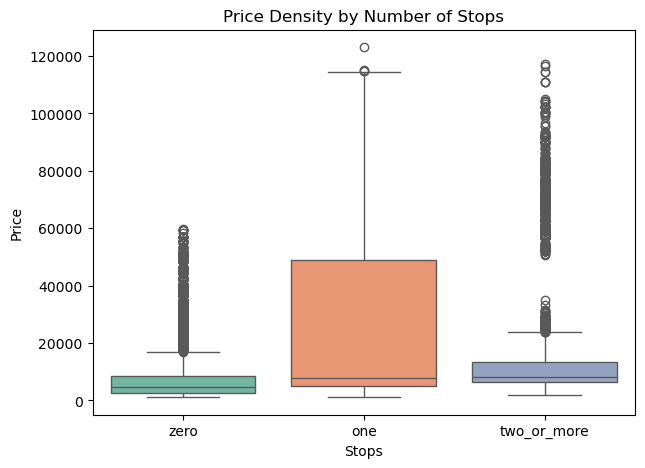

In [80]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['stops'], y=df['price'], palette='Set2')
plt.title("Price Density by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

### Observation:
- Flights with one stop are the most expensive and have the highest fare variability.
- While non-stop flights are the cheapest and most stable in price.
- Flights with multiple stops fall in between, showing moderate prices but wider fluctuations due to inconsistent routing.

### Correlation heatmap between numerical cols

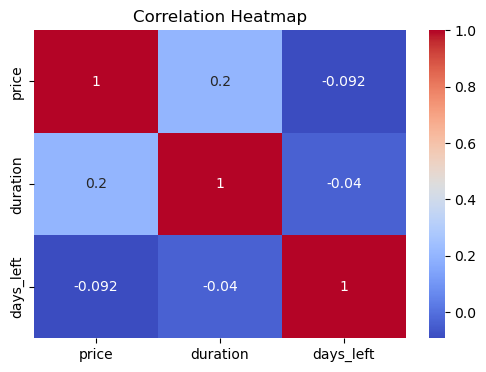

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['price','duration','days_left']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Observation:
- Price and Duration show a weak positive correlation (~0.20), meaning longer flights are slightly more expensive, but duration alone is not a strong predictor of price.
- Price and Days Left show a very weak negative correlation (~–0.09), meaning prices drop slightly when booked earlier, but days_left alone has almost no impact on price.
- Duration and Days Left show no meaningful correlation (~–0.04), indicating that booking time has no relation to the length of the flight.

In [110]:
y=df1['price']
y.shape

(295606,)

In [112]:
X=df1.drop(columns={'price'})
X.shape

(295606, 9)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236484, 9)
(59122, 9)
(236484,)
(59122,)


In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236484 entries, 228006 to 17380
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           236484 non-null  object 
 1   source_city       236484 non-null  object 
 2   departure_time    236484 non-null  object 
 3   stops             236484 non-null  object 
 4   arrival_time      236484 non-null  object 
 5   destination_city  236484 non-null  object 
 6   class             236484 non-null  object 
 7   duration          236484 non-null  float64
 8   days_left         236484 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 18.0+ MB


In [122]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
transformer=ColumnTransformer(transformers=[("t1",OneHotEncoder(),[0,1,2,3,4,5,6]),("t2",StandardScaler(),[7,8])])
pipe=make_pipeline(transformer,DecisionTreeRegressor(max_depth=10, random_state=42))

In [124]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', StandardScaler(),
                                                  [7, 8])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=10, random_state=42))])

In [126]:
y_pred=pipe.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("MSE :",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MSE : 20126704.393827442
MAE: 2497.484503911529
R2 score: 0.9610286764746623


### GradientBoostingRegressor

In [130]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
transformer=ColumnTransformer(transformers=[("t1",OneHotEncoder(),[0,1,2,3,4,5,6]),("t2",StandardScaler(),[7,8])])
pipe=make_pipeline(transformer,GradientBoostingRegressor())

In [132]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', StandardScaler(),
                                                  [7, 8])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [134]:
y_pred=pipe.predict(X_test)

In [136]:
print("MSE :",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MSE : 24481416.885616697
MAE: 2966.5315103942357
R2 score: 0.9525966497475545


### AdaBoostRegressor

In [140]:
from sklearn.ensemble import AdaBoostRegressor
pipe=make_pipeline(transformer,AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=200))

In [142]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', StandardScaler(),
                                                  [7, 8])])),
                ('adaboostregressor',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                                   n_estimators=200))])

In [144]:
y_pred=pipe.predict(X_test)

In [146]:
print("MSE :",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MSE : 35220739.24499797
MAE: 3867.328508124687
R2 score: 0.931802107435963


### XGBRegressor

In [148]:
from xgboost import XGBRegressor
pipe=make_pipeline(transformer,XGBRegressor())

In [150]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', OneHotEncoder(),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('t2', StandardScaler(),
                                                  [7, 8])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

### Test score

In [152]:
y_pred=pipe.predict(X_test)

In [154]:
print("MSE :",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MSE : 11823427.08546878
MAE: 1993.6266647322866
R2 score: 0.9771063327789307


### Train score

In [156]:
y_pred1=pipe.predict(X_train)

In [158]:
print("MSE :",mean_squared_error(y_train,y_pred1))
print("MAE:",mean_absolute_error(y_train,y_pred1))
print('R2 score:',r2_score(y_train,y_pred1))

MSE : 10944224.162710002
MAE: 1919.9990465338367
R2 score: 0.9787885546684265


### Hyper parameter tuning

In [160]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'xgbregressor__n_estimators':[100,200,300],
    'xgbregressor__max_depth':[4,6,8],
    'xgbregressor__learning_rate':[0.01,0.05,0.1],
}
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

In [162]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('t1',
                                                                         OneHotEncoder(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6]),
                                                                        ('t2',
                                                                         StandardScaler(),
                                                                         [7,
                                                                          8])])),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     en...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
                         'xgbregressor__max_depth': [4, 6, 8],
                         'xgbregressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [164]:
print("Best Parameters set found on train set")
print(grid.best_params_)   

Best Parameters set found on train set
{'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 8, 'xgbregressor__n_estimators': 300}


In [166]:
y_pred=grid.best_estimator_.predict(X_test)

In [168]:
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("R2:",r2_score(y_test, y_pred))

MSE: 7497200.787344903
MAE: 1497.2342270505005
R2: 0.9854831695556641


In [170]:
model = grid.best_estimator_.named_steps['xgbregressor']
ct = pipe.named_steps['columntransformer']

feature_names = ct.get_feature_names_out()

importances = model.feature_importances_

fi = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi.sort_values(by='Importance', ascending=False).head(20)

,Feature,Importance
33,t1__class_Business,0.814055
1,t1__airline_Air_India,0.019573
35,t2__duration,0.017597
29,t1__destination_city_Delhi,0.010503
8,t1__source_city_Delhi,0.009220
32,t1__destination_city_Mumbai,0.008637
18,t1__stops_one,0.007981
31,t1__destination_city_Kolkata,0.007477
22,t1__arrival_time_Early_Morning,0.007341
30,t1__destination_city_Hyderabad,0.007165


In [172]:
model = grid.best_estimator_.named_steps['xgbregressor']
ct = pipe.named_steps['columntransformer']
feature_names = ct.get_feature_names_out()
importances = model.feature_importances_
fi = pd.DataFrame({'feature': feature_names, 'importance': importances})
fi['original_feature'] = fi['feature'].apply(lambda x: x.split('__')[1].split('_')[0]if "__" in x else x)
grouped = fi.groupby('original_feature')['importance'].sum().sort_values(ascending=False)
print(grouped)

original_feature
class          0.814055
destination    0.041116
source         0.034259
airline        0.032552
arrival        0.027128
departure      0.018295
duration       0.017597
stops          0.009871
days           0.005125
Name: importance, dtype: float32


### Observation:
- Class is the strongest predictor of price, as Business class fares are significantly higher than Economy.
- Source and Destination Cities impact price based on demand, airport charges, and route popularity.
- Airline has a major influence on ticket cost due to different fare structures among low-cost and premium carriers.
- Departure and Arrival Time moderately affect price since certain time slots (morning/evening) are more in demand.
- Duration shows medium influence because longer flights can cost more, but this varies with stopovers.
- Number of Stops strongly affects price, with non-stop flights costing more and multi-stop flights being cheaper.
- Days Left shows moderate impact—earlier bookings are usually cheaper, though the effect is not very strong.

## Conclusion:
- XGBoost handles mixed data types extremely well (categorical + numeric after encoding).
- It automatically captures non-linear relationships, which are common in flight pricing (e.g., sudden price jumps, time-based variations).
- It deals effectively with outliers, which exist heavily in ticket prices (especially Business class).
- Built-in regularization prevents overfitting, allowing the model to achieve 98% R² while still generalizing well.
- Captures complex feature interactions, such as Airline × Class or Stops × Duration combinations.

In [218]:
import pickle

In [220]:
best_model = grid.best_estimator_
with open('flight_price_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)